In [1]:
import re

<link href="style.css" rel="stylesheet"></link>

<article class="day-desc"><h2>--- Day 5: If You Give A Seed A Fertilizer ---</h2><p>You take the boat and find the gardener right where you were told he would be: managing a giant "garden" that looks more to you like a farm.</p>
<p>"A water source? Island Island <em>is</em> the water source!" You point out that Snow Island isn't receiving any water.</p>
<p>"Oh, we had to stop the water because we <em>ran out of sand</em> to <a href="https://en.wikipedia.org/wiki/Sand_filter" target="_blank">filter</a> it with! Can't make snow with dirty water. Don't worry, I'm sure we'll get more sand soon; we only turned off the water a few days... weeks... oh no." His face sinks into a look of horrified realization.</p>
<p>"I've been so busy making sure everyone here has food that I completely forgot to check why we stopped getting more sand! There's a ferry leaving soon that is headed over in that direction - it's much faster than your boat. Could you please go check it out?"</p>
<p>You barely have time to agree to this request when he brings up another. "While you wait for the ferry, maybe you can help us with our <em>food production problem</em>. The latest Island Island <a href="https://en.wikipedia.org/wiki/Almanac" target="_blank">Almanac</a> just arrived and we're having trouble making sense of it."</p>
<p>The almanac (your puzzle input) lists all of the seeds that need to be planted. It also lists what type of soil to use with each kind of seed, what type of fertilizer to use with each kind of soil, what type of water to use with each kind of fertilizer, and so on. Every type of seed, soil, fertilizer and so on is identified with a number, but numbers are reused by each category - that is, soil <code>123</code> and fertilizer <code>123</code> aren't necessarily related to each other.</p>
<p>For example:</p>
<pre><code>seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4
</code></pre>

<p>The almanac starts by listing which seeds need to be planted: seeds <code>79</code>, <code>14</code>, <code>55</code>, and <code>13</code>.</p>
<p>The rest of the almanac contains a list of <em>maps</em> which describe how to convert numbers from a <em>source category</em> into numbers in a <em>destination category</em>. That is, the section that starts with <code>seed-to-soil map:</code> describes how to convert a <em>seed number</em> (the source) to a <em>soil number</em> (the destination). This lets the gardener and his team know which soil to use with which seeds, which water to use with which fertilizer, and so on.</p>
<p>Rather than list every source number and its corresponding destination number one by one, the maps describe entire <em>ranges</em> of numbers that can be converted. Each line within a map contains <span title="Don't blame me for the weird order. Blame LXC container.conf UID mappings.">three numbers</span>: the <em>destination range start</em>, the <em>source range start</em>, and the <em>range length</em>.</p>
<p>Consider again the example <code>seed-to-soil map</code>:</p>
<pre><code>50 98 2
52 50 48
</code></pre>
<p>The first line has a <em>destination range start</em> of <code>50</code>, a <em>source range start</em> of <code>98</code>, and a <em>range length</em> of <code>2</code>. This line means that the source range starts at <code>98</code> and contains two values: <code>98</code> and <code>99</code>. The destination range is the same length, but it starts at <code>50</code>, so its two values are <code>50</code> and <code>51</code>. With this information, you know that seed number <code>98</code> corresponds to soil number <code>50</code> and that seed number <code>99</code> corresponds to soil number <code>51</code>.</p>
<p>The second line means that the source range starts at <code>50</code> and contains <code>48</code> values: <code>50</code>, <code>51</code>, ..., <code>96</code>, <code>97</code>. This corresponds to a destination range starting at <code>52</code> and also containing <code>48</code> values: <code>52</code>, <code>53</code>, ..., <code>98</code>, <code>99</code>. So, seed number <code>53</code> corresponds to soil number <code>55</code>.</p>
<p>Any source numbers that <em>aren't mapped</em> correspond to the <em>same</em> destination number. So, seed number <code>10</code> corresponds to soil number <code>10</code>.</p>
<p>So, the entire list of seed numbers and their corresponding soil numbers looks like this:</p>
<pre><code>seed  soil
0     0
1     1
...   ...
48    48
49    49
50    52
51    53
...   ...
96    98
97    99
98    50
99    51
</code></pre>
<p>With this map, you can look up the soil number required for each initial seed number:</p>
<ul>
<li>Seed number <code>79</code> corresponds to soil number <code>81</code>.</li>
<li>Seed number <code>14</code> corresponds to soil number <code>14</code>.</li>
<li>Seed number <code>55</code> corresponds to soil number <code>57</code>.</li>
<li>Seed number <code>13</code> corresponds to soil number <code>13</code>.</li>
</ul>
<p>The gardener and his team want to get started as soon as possible, so they'd like to know the closest location that needs a seed. Using these maps, find <em>the lowest location number that corresponds to any of the initial seeds</em>. To do this, you'll need to convert each seed number through other categories until you can find its corresponding <em>location number</em>. In this example, the corresponding types are:</p>
<ul>
<li>Seed <code>79</code>, soil <code>81</code>, fertilizer <code>81</code>, water <code>81</code>, light <code>74</code>, temperature <code>78</code>, humidity <code>78</code>, <em>location <code>82</code></em>.</li>
<li>Seed <code>14</code>, soil <code>14</code>, fertilizer <code>53</code>, water <code>49</code>, light <code>42</code>, temperature <code>42</code>, humidity <code>43</code>, <em>location <code>43</code></em>.</li>
<li>Seed <code>55</code>, soil <code>57</code>, fertilizer <code>57</code>, water <code>53</code>, light <code>46</code>, temperature <code>82</code>, humidity <code>82</code>, <em>location <code>86</code></em>.</li>
<li>Seed <code>13</code>, soil <code>13</code>, fertilizer <code>52</code>, water <code>41</code>, light <code>34</code>, temperature <code>34</code>, humidity <code>35</code>, <em>location <code>35</code></em>.</li>
</ul>
<p>So, the lowest location number in this example is <code><em>35</em></code>.</p>
<p><em>What is the lowest location number that corresponds to any of the initial seed numbers?</em></p>
</article>


In [2]:
test_almanac = """seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4"""

In [3]:
class Mapping:
    def __init__(self, raw: list[list[str]]) -> None:
        self.mapping = [
            (destination_start, source_start, rng)
            for destination_start, source_start, rng in raw
        ]

    def __getitem__(self, key):
        for destination_start, source_start, rng in self.mapping:
            if source_start <= key <= source_start + rng:
                return destination_start + key - source_start
        return key

    def __str__(self) -> str:
        return "".join(
            f"{destination_start=}, {source_start=} {rng=} \n"
            for destination_start, source_start, rng in self.mapping
        )


def create_map(raw: list[list[str]]) -> dict[int, int]:
    # too slow
    mapping = {}
    for destination_start, source_start, rng in raw:
        for delta in range(int(rng)):
            mapping[int(source_start) + delta] = int(destination_start) + delta
    return mapping


def create_almanac(almanac: str) -> dict[str, list[int]]:
    blank_line_regex = re.compile(r"(?:\r?\n){2,}")
    almanac = re.split(blank_line_regex, almanac.strip())
    almanac = [lst.split(":") for lst in almanac]
    almanac = {
        lst[0]: [[int(i) for i in l.split()] for l in lst[1].splitlines() if l]
        for lst in almanac
    }
    almanac["seeds"] = [int(s) for s in almanac["seeds"][0]]
    for lst in almanac.keys():
        if lst == "seeds":
            continue
        almanac[lst] = Mapping(almanac[lst])
    return almanac


def get_lowest_location(almanac: str) -> int:
    almanac = create_almanac(almanac)
    result = almanac["seeds"]
    for lst, mapping in almanac.items():
        if lst == "seeds":
            continue
        result = [mapping[o] for o in result]
    return min(result)


get_lowest_location(test_almanac)

35

In [4]:
with open("./input/day5.txt") as f:
    print(get_lowest_location(f.read()))

323142486


<link href="style.css" rel="stylesheet"></link>

<p>Your puzzle answer was <code>323142486</code>.</p>
<p class="day-success">The first half of this puzzle is complete! It provides one gold star: *</p>


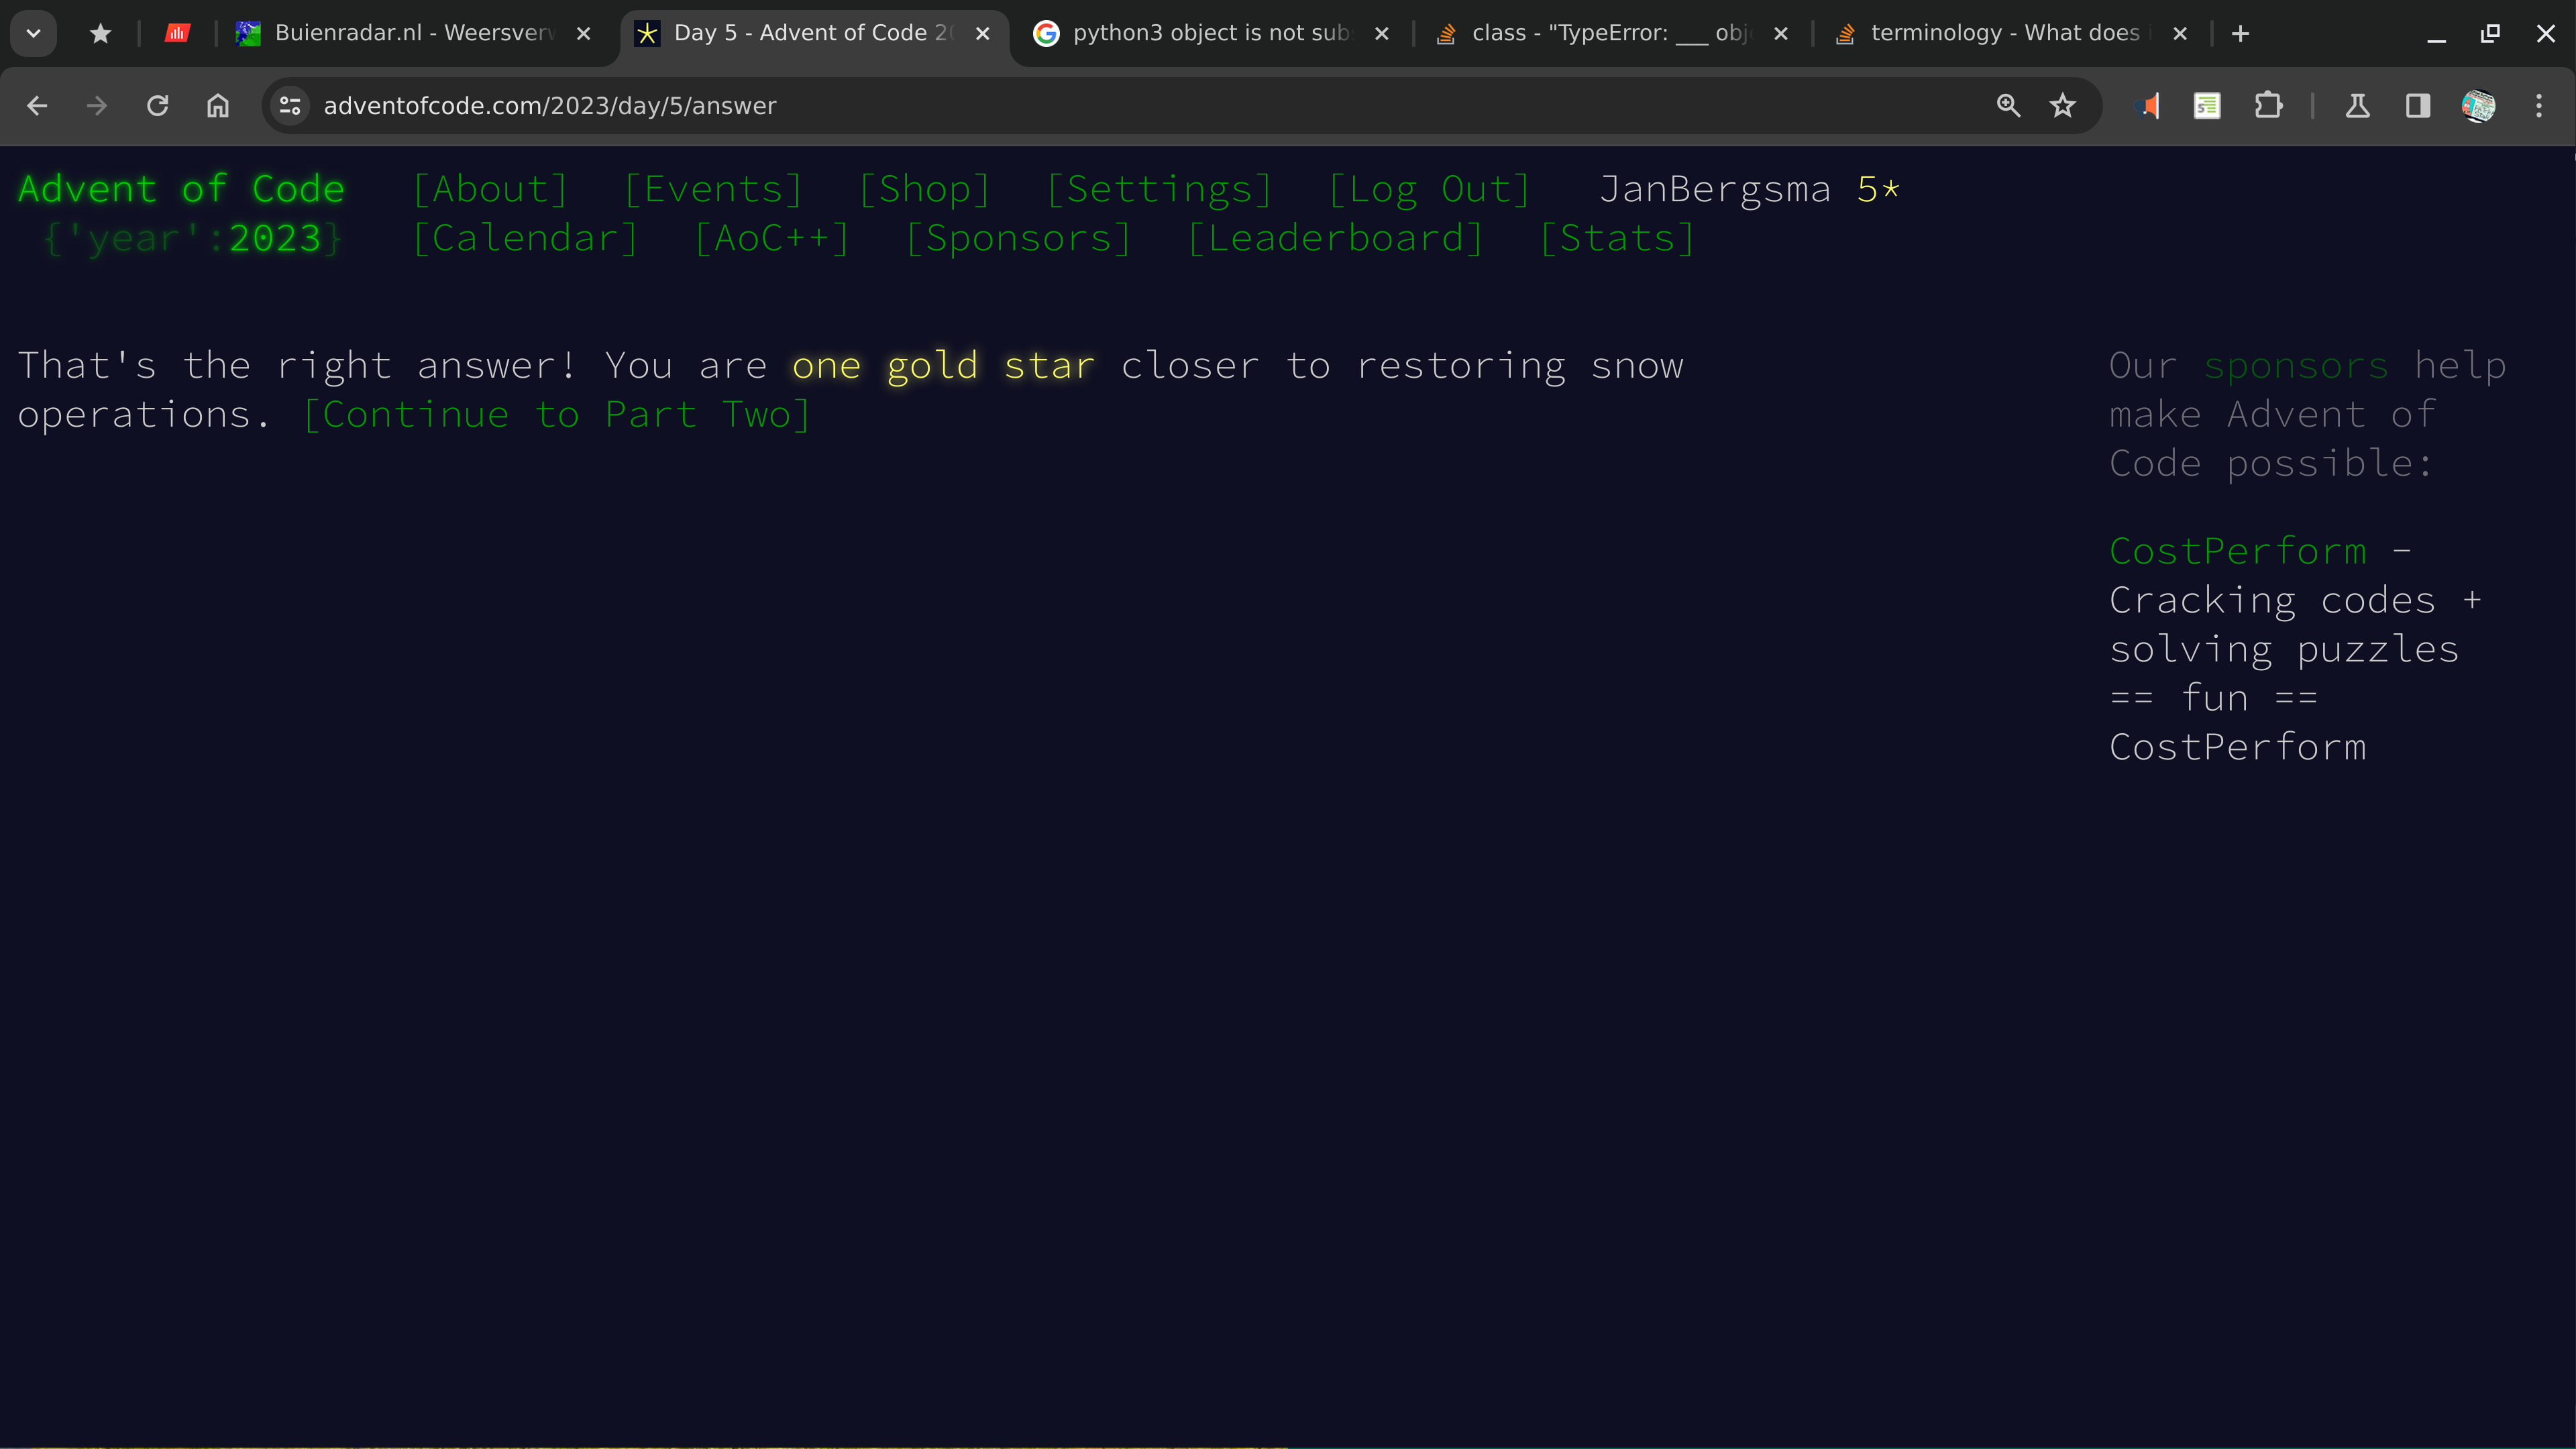


<link href="style.css" rel="stylesheet"></link>

<article class="day-desc"><h2 id="part2">--- Part Two ---</h2><p>Everyone will starve if you only plant such a small number of seeds. Re-reading the almanac, it looks like the <code>seeds:</code> line actually describes <em>ranges of seed numbers</em>.</p>
<p>The values on the initial <code>seeds:</code> line come in pairs. Within each pair, the first value is the <em>start</em> of the range and the second value is the <em>length</em> of the range. So, in the first line of the example above:</p>
<pre><code>seeds: 79 14 55 13</code></pre>
<p>This line describes two ranges of seed numbers to be planted in the garden. The first range starts with seed number <code>79</code> and contains <code>14</code> values: <code>79</code>, <code>80</code>, ..., <code>91</code>, <code>92</code>. The second range starts with seed number <code>55</code> and contains <code>13</code> values: <code>55</code>, <code>56</code>, ..., <code>66</code>, <code>67</code>.</p>
<p>Now, rather than considering four seed numbers, you need to consider a total of <em>27</em> seed numbers.</p>
<p>In the above example, the lowest location number can be obtained from seed number <code>82</code>, which corresponds to soil <code>84</code>, fertilizer <code>84</code>, water <code>84</code>, light <code>77</code>, temperature <code>45</code>, humidity <code>46</code>, and <em>location <code>46</code></em>. So, the lowest location number is <code><em>46</em></code>.</p>
<p>Consider all of the initial seed numbers listed in the ranges on the first line of the almanac. <em>What is the lowest location number that corresponds to any of the initial seed numbers?</em></p>
</article>


In [5]:
test_almanac = """
seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4
"""

In [6]:
from __future__ import annotations
from dataclasses import dataclass
from itertools import chain


@dataclass(init=True, repr=True, eq=True, order=True, frozen=True, slots=True)
class Range:
    start: int
    length: int

    def __contains__(self, value) -> bool:
        return self.start <= value < self.start + self.length


@dataclass(init=True, repr=True, eq=True, order=True, frozen=True, slots=True)
class Map:
    destination_start: int
    source_start: int
    rng: int

    def __getitem__(self, key) -> int | None:
        if self.source_start <= key <= self.source_start + self.rng:
            return self.destination_start + key - self.source_start
        return None


class Mapping:
    def __init__(self, raw: list[list[int]]) -> None:
        raw.sort(key=lambda e: (e[1], e[2], e[0]))
        self.mapping = [
            Map(destination_start, source_start, rng)
            for destination_start, source_start, rng in raw
        ]

    def map_range(self, r: Range) -> list[Range]:
        current = r.start
        length = r.length
        i, n = 0, len(self.mapping)
        ranges = []
        while length > 0 and i < n:
            m = self.mapping[i]
            if current + length <= m.source_start:
                ranges.append(Range(current, length))
                length = 0
            elif current < m.source_start:
                l = m.source_start - current
                ranges.append(Range(current, l))
                length -= l
                current = m.source_start
            elif m.source_start <= current < m.source_start + m.rng:
                l = min(length, m.source_start + m.rng - current)
                ranges.append(Range(m[current], l))
                length -= l
                current = m.source_start + m.rng
            else:
                i += 1
        if length > 0:
            ranges.append(Range(current, length))
        return ranges

    def __getitem__(self, key):
        for destination_start, source_start, rng in self.mapping:
            if source_start <= key <= source_start + rng:
                return destination_start + key - source_start
        return key

    def __str__(self) -> str:
        return "".join(f"{m=} \n" for m in self.mapping)

    def __repr__(self) -> str:
        return self.__str__()


# Tests for maprange
# Range Before Map range
# _____
#      ----------
#
r = Range(0, 4)  # (0,1, 2, 3)
m = Mapping([[17, 4, 3]])
expected = [Range(0, 4)]
actual = m.map_range(r)
assert actual == expected, f"Range Before Map range {actual=} {expected=}"
# Range Before Map with overlap
# ______
#      ----------
#
r = Range(0, 4)
m = Mapping([[17, 3, 3]])
expected = [Range(0, 3), Range(17, 1)]
actual = m.map_range(r)

assert actual == expected, f"Range Before Map with overlap {actual=} {expected=}"
# Range fully inside Map
#
#      __________
#   ------------------
r = Range(3, 2)
m = Mapping([[17, 0, 10]])
expected = [Range(20, 2)]
actual = m.map_range(r)

assert actual == expected, f"Range fully inside Map {actual=} {expected=}"

# Map fully inside Range
#      0         12
#      __________
#       -------
#       3     5
r = Range(0, 12)
m = Mapping([[17, 3, 2]])
expected = [Range(0, 3), Range(17, 2), Range(5, 12 - 5)]
actual = m.map_range(r)

assert actual == expected, f"Map fully inside Range {actual=} {expected=}"
# Range after Map range
#               _____
#       --------
r = Range(5, 12)
m = Mapping([[17, 3, 2]])
expected = [Range(5, 12)]
actual = m.map_range(r)

assert actual == expected, f"Range after Map range {actual=} {expected=}"
#
# Range after Map range with overlap
#             _____
#       --------
r = Range(4, 12)
m = Mapping([[17, 3, 2]])
expected = [Range(18, 1), Range(5, 11)]
actual = m.map_range(r)

assert actual == expected, f"Range after Map range {actual=} {expected=}"
#
#
# Range between Map range
#               _____
#       --------     -------
r = Range(6, 3)
m = Mapping([[13, 0, 6], [23, 9, 10]])
expected = [Range(6, 3)]
actual = m.map_range(r)

assert actual == expected, f"Range after Map range {actual=} {expected=}"
#
# Range overlaps all Map ranges
#      0                             15
#      ______________________________
#       --------     -------  ----
#       3      5     8     10 12 13
r = Range(0, 15)
m = Mapping([[13, 3, 2], [9, 8, 2], [33, 12, 1]])
expected = [
    Range(0, 3),
    Range(13, 2),
    Range(5, 3),
    Range(9, 2),
    Range(10, 2),
    Range(33, 1),
    Range(13, 2),
]
actual = m.map_range(r)

assert actual == expected, f"Range overlaps all Map ranges {actual=} {expected=}"


#
# Range overlaps first map
#      __________
#       --------     -------  ----
#
r = Range(0, 5)
m = Mapping([[13, 1, 3], [9, 6, 2], [33, 12, 1]])
expected = [
    Range(0, 1),
    Range(13, 3),
    Range(4, 1),
]
actual = m.map_range(r)

assert actual == expected, f"Range overlaps first map {actual=} {expected=}"
#
# Range overlaps last two maps
#              5        14
#              _________
#       ---    --     -
#       1  4   6 8   12
#       12345678901234567890
#                1         2
r = Range(5, 9)
m = Mapping([[13, 1, 3], [9, 6, 2], [33, 12, 1]])
expected = [Range(5, 1), Range(9, 2), Range(8, 4), Range(33, 1), Range(13, 1)]
actual = m.map_range(r)
assert actual == expected, f"Range overlaps last two maps {actual=} {expected=}"

#
#
# Range between Map range
#                     ______
#       --------     -------  ----
#
r = Range(7, 2)
m = Mapping([[13, 1, 3], [9, 6, 4], [33, 16, 1]])
expected = [
    Range(10, 2),
]
actual = m.map_range(r)

assert actual == expected, f"Range between Map range {actual=} {expected=}"
#
# Range between Map range
#                              __
#       --------     -------  ----
#
r = Range(14, 4)
m = Mapping([[13, 1, 3], [9, 6, 2], [33, 12, 7]])
expected = [
    Range(35, 4),
]
actual = m.map_range(r)

assert actual == expected, f"Range between Map range {actual=} {expected=}"

# error 1
# result=[Range(start=55, length=13), Range(start=79, length=14)]
# result=[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
# m=Map(destination_start=50, source_start=98, rng=2)
# m=Map(destination_start=52, source_start=50, rng=48)
# result=[Range(start=55, length=13), Range(start=79, length=14)]
# result=[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
rs = [Range(start=55, length=13), Range(start=79, length=14)]
m = Mapping([[50, 98, 2], [52, 50, 48]])
expected = [Range(57, 13), Range(81, 14)]
actual = list(chain.from_iterable(m.map_range(r) for r in rs))

assert actual == expected, f"Error 1 {actual=} {expected=}"

In [7]:
from itertools import chain


def create_almanac(almanac: str) -> dict[str, list[int]]:
    blank_line_regex = re.compile(r"(?:\r?\n){2,}")
    almanac = re.split(blank_line_regex, almanac.strip())
    almanac = [lst.split(":") for lst in almanac]
    almanac = {
        lst[0]: [[int(i) for i in l.split()] for l in lst[1].splitlines() if l]
        for lst in almanac
    }
    temp = [int(s) for s in almanac["seeds"][0]]
    almanac["seeds"] = [Range(temp[i - 1], temp[i]) for i in range(1, len(temp), 2)]
    for lst in almanac.keys():
        if lst == "seeds":
            continue
        almanac[lst] = Mapping(almanac[lst])
    return almanac


def get_lowest_location_ranges(almanac: str) -> int:
    almanac = create_almanac(almanac)
    result = almanac["seeds"]
    for lst, mapping in almanac.items():
        if lst == "seeds":
            continue
        result = sorted(chain.from_iterable([mapping.map_range(r) for r in result]))
    return min(result, key=lambda m: m.start).start


result = get_lowest_location_ranges(test_almanac)

print(f"{result}")

46


In [8]:
with open("./input/day5.txt") as f:
    print(get_lowest_location_ranges(f.read()))

79874951


<link href="style.css" rel="stylesheet"></link>

<main>
<article><p>That's the right answer!  You are <span class="day-success">one gold star</span> closer to restoring snow operations.</p><p>You have completed Day 5! You can <span class="share">[Share<span class="share-content">on
  <a href="https://twitter.com/intent/tweet?text=I+just+completed+%22If+You+Give+A+Seed+A+Fertilizer%22+%2D+Day+5+%2D+Advent+of+Code+2023&amp;url=https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F5&amp;related=ericwastl&amp;hashtags=AdventOfCode" target="_blank">Twitter</a>
  <a href="javascript:void(0);" onclick="var ms; try{ms=localStorage.getItem('mastodon.server')}finally{} if(typeof ms!=='string')ms=''; ms=prompt('Mastodon Server?',ms); if(typeof ms==='string' &amp;&amp; ms.length){this.href='https://'+ms+'/share?text=I+just+completed+%22If+You+Give+A+Seed+A+Fertilizer%22+%2D+Day+5+%2D+Advent+of+Code+2023+%23AdventOfCode+https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F5';try{localStorage.setItem('mastodon.server',ms);}finally{}}else{return false;}" target="_blank">Mastodon</a></span>]</span> this victory or <a href="/2023">[Return to Your Advent Calendar]</a>.</p></article>
</main>


<link href="style.css" rel="stylesheet"></link>

<main>
<p>Your puzzle answer was <code>79874951</code>.</p><p class="day-success">Both parts of this puzzle are complete! They provide two gold stars: **</p>
<p>At this point, you should <a href="/2023">return to your Advent calendar</a> and try another puzzle.</p>
<p>If you still want to see it, you can <a href="5/input" target="_blank">get your puzzle input</a>.</p>
<p>You can also <span class="share">[Share<span class="share-content">on
  <a href="https://twitter.com/intent/tweet?text=I%27ve+completed+%22If+You+Give+A+Seed+A+Fertilizer%22+%2D+Day+5+%2D+Advent+of+Code+2023&amp;url=https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F5&amp;related=ericwastl&amp;hashtags=AdventOfCode" target="_blank">Twitter</a>
  <a href="javascript:void(0);" onclick="var ms; try{ms=localStorage.getItem('mastodon.server')}finally{} if(typeof ms!=='string')ms=''; ms=prompt('Mastodon Server?',ms); if(typeof ms==='string' &amp;&amp; ms.length){this.href='https://'+ms+'/share?text=I%27ve+completed+%22If+You+Give+A+Seed+A+Fertilizer%22+%2D+Day+5+%2D+Advent+of+Code+2023+%23AdventOfCode+https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F5';try{localStorage.setItem('mastodon.server',ms);}finally{}}else{return false;}" target="_blank">Mastodon</a></span>]</span> this puzzle.</p>
</main>


In [9]:
from itertools import chain


class Mapping:
    def __init__(self, raw: list[list[str]]) -> None:
        self.mapping = [
            (destination_start, source_start, rng)
            for destination_start, source_start, rng in raw
        ]

    def __getitem__(self, key):
        for destination_start, source_start, rng in self.mapping:
            if source_start <= key <= source_start + rng:
                return destination_start + key - source_start
        return key

    def __str__(self) -> str:
        return "".join(
            f"{destination_start=}, {source_start=} {rng=} \n"
            for destination_start, source_start, rng in self.mapping
        )


def create_almanac(almanac: str) -> dict[str, list[int]]:
    blank_line_regex = re.compile(r"(?:\r?\n){2,}")
    almanac = re.split(blank_line_regex, almanac.strip())
    almanac = [lst.split(":") for lst in almanac]
    almanac = {
        lst[0]: [[int(i) for i in l.split()] for l in lst[1].splitlines() if l]
        for lst in almanac
    }
    temp = [int(s) for s in almanac["seeds"][0]]
    almanac["seeds"] = [
        list(range(temp[i - 1], temp[i - 1] + temp[i])) for i in range(1, len(temp), 2)
    ]
    for lst in almanac.keys():
        if lst == "seeds":
            continue
        almanac[lst] = Mapping(almanac[lst])
    return almanac


def get_lowest_location_II(almanac: str) -> int:
    almanac = create_almanac(almanac)
    result = almanac["seeds"]
    result = sorted(chain.from_iterable(result))
    print(f"{result=}")
    for lst, mapping in almanac.items():
        if lst == "seeds":
            continue
        result = sorted(mapping[o] for o in result)
        print(f"{result=}")
    return result[0]


get_lowest_location_II(test_almanac)

result=[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
result=[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
result=[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
result=[53, 54, 55, 56, 57, 62, 63, 64, 65, 66, 67, 68, 69, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
result=[46, 47, 48, 49, 50, 55, 56, 57, 58, 59, 60, 61, 62, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]
result=[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 78, 79, 80, 82, 83, 84, 85, 86, 91, 92, 93, 94, 95, 96, 97, 98]
result=[46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 78, 79, 80, 82, 83, 84, 85, 86, 91, 92, 93, 94, 95, 96, 97, 98]
result=[46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 60, 82, 83, 84, 86, 87, 88, 89, 90, 95, 96, 97, 98]


46

In [10]:
# with open("./input/day5.txt") as f:
#     print(min(get_lowest_location_II(f.read())))

In [11]:
# result=[Range(start=55, length=13), Range(start=79, length=14)]
# result=[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
# m=Map(destination_start=50, source_start=98, rng=2)
# m=Map(destination_start=52, source_start=50, rng=48)
# result=[Range(start=55, length=13), Range(start=79, length=14)]
# result=[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
# result=[Range(start=51, length=6), Range(start=61, length=7), Range(start=79, length=14)]
# result=[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
# result=[Range(start=44, length=6), Range(start=54, length=7), Range(start=72, length=14)]
# result=[53, 54, 55, 56, 57, 62, 63, 64, 65, 66, 67, 68, 69, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
# result=[Range(start=44, length=6), Range(start=45, length=9), Range(start=54, length=7), Range(start=72, length=5)]
# result=[46, 47, 48, 49, 50, 55, 56, 57, 58, 59, 60, 61, 62, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]
# result=[Range(start=44, length=6), Range(start=45, length=9), Range(start=54, length=7), Range(start=72, length=5)]
# result=[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 78, 79, 80, 82, 83, 84, 85, 86, 91, 92, 93, 94, 95, 96, 97, 98]
# result=[Range(start=44, length=6), Range(start=45, length=9), Range(start=54, length=2), Range(start=60, length=5), Range(start=76, length=5)]
# result=[46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 78, 79, 80, 82, 83, 84, 85, 86, 91, 92, 93, 94, 95, 96, 97, 98]
# result=[Range(start=44, length=6), Range(start=45, length=9), Range(start=54, length=2), Range(start=60, length=5), Range(start=76, length=5)]
# result=[46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 60, 82, 83, 84, 86, 87, 88, 89, 90, 95, 96, 97, 98]